# K-Means Clustering

## The strategic team of a mall gathered the following info about the customers of a mall.each row corresponds to a customer visiting the mall. the last variable spending score can range between 1-100 and depicts how much each cust spends at the mall.the lower the score,the lower the customer spends over a period of 1 year.The strategic team wants to understand its customers,and identify a pattern. To resolve this,we will create a DV which can take a finite number of values,and these values will be the class of the DV we are creating.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

## To create the matrix of features,we exclude the custid(not needed),though other features are not redundant,we will only keep the annual income and spending score,as that will help us in the visualisation of the clusters in the form of 2 dimentional plots.

In [2]:
dataset = pd.read_csv('Kmeans_Customers.csv') ##In clustering,we DO NOT HAVE A DEPENDENT VARIABLE.We do the clustering based 
X = dataset.iloc[:, [3,4]].values           #on the features only.#a colon : means a range

## We will not have a split of training and test set as we do not have a dependent variable.

## Using the elbow method to find the optimal number of clusters

## As kmeans is an iterative process,whereby at each step we compute the seed points,we use a loop to run our code iteratively

## Traditional k-means utilizes a randomization process for initializing these centroids -- though this is not the only approach -- but poor initialization can lead to increased numbers of required clustering iterations to reach convergence,  and a less-efficient algorithm overall. k-means++ is relatively consistent within clusters, with the specific data points selected as initial centroids varying slightly.

C:\Users\RIYANRIYA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


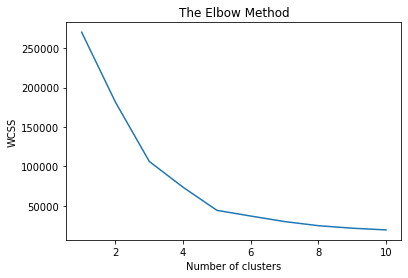

In [3]:
#We create 10 clusters initailly
from sklearn.cluster import KMeans
wcss = []   #wcss is initialised as an empty list,which will be populated with the wcss of each cluster as the loop iterates
for i in range(1, 11):   #for 10 clusters,the upper bound is 11,as the range will include 1 less than the upper bound limit
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) #Fit method helps to run the loop/algo on the feature set
    wcss.append(kmeans.inertia_)  #inertia is the attribute of the object kmeans which helps us generate wcss
plt.plot(range(1, 11), wcss)      #we start this line shifting indent to left,to confirm that we are out of loop
plt.title('The Elbow Method')     #range 1-11 shows what reflects in X axis,while wcss reflects in y axis
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()                       #THE OPTIMAL NUMBER OF CLUSTERS IS 5

## Method for initialization: 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

## Fitting the K-Means model on the dataset

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) #this line trains the kmeans model to identify 5 clusters,and creates a DV with 
                                 #thse 5 clstrs,DV will be 0,1,2,3,4(5 clusters)


In [5]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### plt.scatter(X[y_kmeans == 0,0]) #when creating a scatterplot,we have to have the X cordinate as the first arg as it contains the number of features. [,0] implies we want to select those customers who fall in the first cluster.[y_kmeans == 0,0] implies we want to select only those rows of customers from the y_kmeans object who fall in the first cluster.Now X has 2 columns,1st column is the income,and 2nd column is the spending score.as the X cordinate takes all the rowsof data which fall in cluster 1 and the 1st column(0),the Y cordinate will also take all the rows for the first cluster,but the 2nd column(1).So,x-coord=(X[y_kmeans ==0,0])y-coord=(X[y_kmeans== 0,1]) for our first cluster.


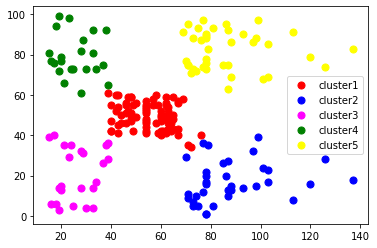

In [7]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='r',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='magenta',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='green',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='yellow',label='cluster5')
plt.legend()
plt.show()